In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Tushar\Desktop\Day-7\Assignment\general_data.csv")

In [54]:
df.skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
EmployeeCount              0.000000
EmployeeID                -0.002335
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
Attrition_Encoded          1.846529
dtype: float64

In [55]:
df.kurtosis()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
EmployeeCount              0.000000
EmployeeID                -1.198607
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
Attrition_Encoded          1.410313
dtype: float64

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

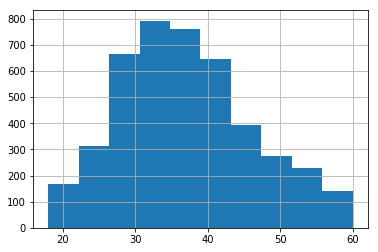

In [57]:
import matplotlib.pyplot as plt
df.Age.hist()
plt.show()

## Non-Parametric Tests

### Since no paired features are present we cannot do Wilcoxon Test and Freidman Test
### Our Dependent Variable is Categorical so Mann Whitkey and Kruskal Wallis tests cannot be performed

## Chi2 Test

In [22]:
from scipy.stats import chi2_contingency

### H0 : There is no Significant impact of Age on Attrition
### H1 : There is Significant impact of Age on Attrition

In [23]:
chitable=pd.crosstab(df.Age,df.Attrition)

In [31]:
chitable.head()

Attrition,No,Yes
Age,,
18,12,11
19,9,18
20,15,18
21,21,18
22,32,15


In [25]:
stats,p,dof,expected=chi2_contingency(chitable)

In [30]:
print("p-value is-",p)

p-value is- 1.20869585240706e-50


## Since the p-value<0.05 we reject H0 . That means Age has significant impact on Attrition

In [33]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Encoded
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,1


### H0 : There is no Significant impact of Department on Attrition
### H1 : There is Significant impact of Department on Attrition

In [34]:
chitable=pd.crosstab(df.Department,df.Attrition)

In [35]:
chitable.head()


Attrition,No,Yes
Department,,
Human Resources,132,55
Research & Development,2416,449
Sales,1129,201


In [36]:
stats,p,dof,expected=chi2_contingency(chitable)
print("p-value is-",p)

p-value is- 2.3829705707693105e-06


### Since the p-value<0.05 we reject H0 . That means Department has significant impact on Attrition

## Mann Whitney Test
### H0 : 

In [58]:
from scipy.stats import mannwhitneyu

In [59]:
df['Attrition_E']=le.fit_transform(df.Attrition)

In [69]:
stats,p=mannwhitneyu(df.DistanceFromHome[df.Attrition=='Yes'],df.DistanceFromHome[df.Attrition=='No'])

In [71]:
print("p-value-",p)

p-value- 0.488538986087403


# Parametric Tests
## We cannot do any of the Parametric tests because the Data is not normally distributed